In [54]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

In [26]:
# Function for plotting model loss
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']

    # Set figure size
    plt.figure(figsize=(12, 8))

    # Generate line plot of training, testing loss over epochs
    plt.plot(train_loss, label='Training Loss', color='#185fad')
    plt.plot(test_loss, label='Testing Loss', color='orange')

    # Set title
    plt.title('Training and Testing Loss by Epoch', fontsize = 25)
    plt.xlabel('Epoch', fontsize = 18)
    plt.ylabel('Categorical Crossentropy', fontsize = 18)
    plt.xticks(np.arange(10), np.arange(10))

    plt.legend(fontsize = 18);

### Reference:
- https://git.generalassemb.ly/dsi-delta/56-cnns/blob/main/workbook-in-class.ipynb

In [2]:
# getting cwd with os, use if needed:
# path = os.getcwd()

In [3]:
data_path = './training'
data_dir = os.listdir(data_path)

In [4]:
# removing .DS_Store
data_dir.remove('.DS_Store')

In [5]:
# Importing all images and labels for training:

img_data_list = []
labels = []

for data in data_dir:
    img_list = os.listdir(data_path+'/'+data)
    print('Loading images of', data)
    for img in img_list:
        img_path = data_path +'/'+ data + '/' + img
        try:
            img = image.load_img(img_path, target_size= (28,28))
            x = image.img_to_array(img)
            x = preprocess_input(x)
            img_data_list.append(x)
            labels.append(data)
        except:
            continue

Loading images of drinks
Loading images of ads


/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loading images of vegetarian
Loading images of diserts
Loading images of places
Loading images of clutter
Loading images of non_vegetarian


In [6]:
# Converting images into a numpy array:
img_data = np.array(img_data_list)

In [7]:
np.save('./data/train_sq_data.npy', img_data)

In [8]:
np.save('./data/train_sq_labels.npy', labels)

In [9]:
img_data = np.load('./data/train_sq_data.npy')
labels = np.load('./data/train_sq_labels.npy')

In [10]:
# Use if needed
# num_class = 3
# num_of_samples = img_data.shape[0]

In [11]:
# converting labels into numerical values:

numerical_labels = []
for each in labels:
    if each == 'vegetarian':
        numerical_labels.append(0)
    elif each == 'non_vegetarian':
        numerical_labels.append(1)
    elif each == 'places':
        numerical_labels.append(2)
    elif each == 'diserts':
        numerical_labels.append(3)
    elif each == 'drinks':
        numerical_labels.append(4)
    elif each == 'clutter':
        numerical_labels.append(5)
    elif each == 'ads':
        numerical_labels.append(6)

In [12]:
numerical_labels= np.array(numerical_labels)

# Train Test Split:

In [13]:
x = img_data

In [15]:
y = utils.to_categorical(numerical_labels, num_classes=7)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

# Modeling :

In [25]:
# More Complexity!
# Instantiate a CNN
cnn_model_2 = Sequential()

# Add a convolutional layer
cnn_model_2.add(Conv2D(filters=16,             # number of filters
                       kernel_size=(3,3),      # height/width of filter
                       activation='relu',      # activation function 
                       input_shape=(28,28,3))) # shape of input (image)

# Add a pooling layer
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons
cnn_model_2.add(Dense(64, activation='relu'))

# Add a densely-connected layer with 32 neurons
cnn_model_2.add(Dense(32, activation='relu'))

# Add a final layer with 3 neurons
cnn_model_2.add(Dense(7, activation='softmax'))

# Compile model
cnn_model_2.compile(loss='categorical_crossentropy',
                    optimizer=Adam(learning_rate=0.0001),
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_2.fit(X_train,
                          y_train,
                          batch_size=10,
                          validation_data=(X_test, y_test),
                          epochs=20,
                          verbose=1)

Epoch 1/20
252/252 [==============================] - 2s 5ms/step - loss: 3.1841 - accuracy: 0.4275 - val_loss: 2.0728 - val_accuracy: 0.4587
Epoch 2/20
252/252 [==============================] - 1s 4ms/step - loss: 1.6517 - accuracy: 0.4946 - val_loss: 1.7549 - val_accuracy: 0.5016
Epoch 3/20
252/252 [==============================] - 1s 4ms/step - loss: 1.4709 - accuracy: 0.5395 - val_loss: 1.7172 - val_accuracy: 0.5206
Epoch 4/20
252/252 [==============================] - 1s 4ms/step - loss: 1.3293 - accuracy: 0.5729 - val_loss: 1.5528 - val_accuracy: 0.5270
Epoch 5/20
252/252 [==============================] - 1s 5ms/step - loss: 1.2112 - accuracy: 0.6103 - val_loss: 1.5544 - val_accuracy: 0.5651
Epoch 6/20
252/252 [==============================] - 1s 5ms/step - loss: 1.1269 - accuracy: 0.6365 - val_loss: 1.5046 - val_accuracy: 0.5714
Epoch 7/20
252/252 [==============================] - 1s 4ms/step - loss: 1.0186 - accuracy: 0.6655 - val_loss: 1.4654 - val_accuracy: 0.5698
Epoch 

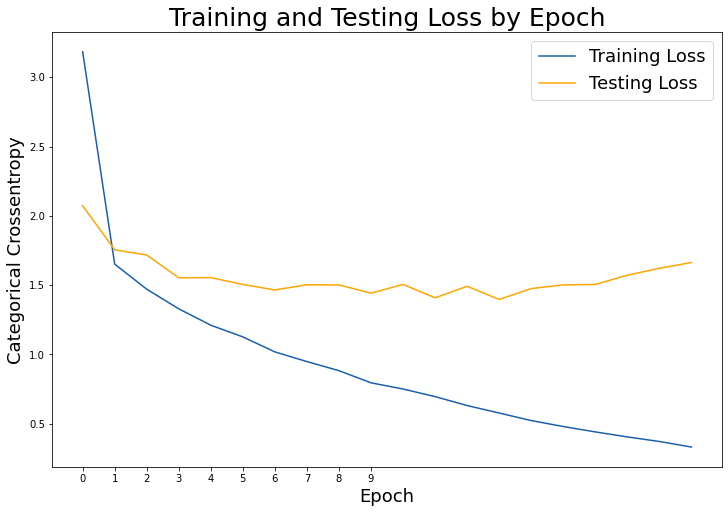

In [28]:
plot_loss(history)

# Predicting Test Data:

In [29]:
data_path = './testing'
data_dir = os.listdir(data_path)

In [30]:
data_dir.remove('.DS_Store')

In [31]:
img_data_list = []
labels = []
image_paths = []

for data in data_dir:
    img_list = os.listdir(data_path+'/'+data)
    print('Loading images of', data)
    for img in img_list:
        img_path = data_path+'/'+data + '/' +img
        try:
            img = image.load_img(img_path, target_size= (28,28))
            x = image.img_to_array(img)
            x = preprocess_input(x)
            img_data_list.append(x)
            labels.append(data)
            image_paths.append(img_path)
        except:
            continue

Loading images of drinks
Loading images of ads
Loading images of vegetarian
Loading images of diserts
Loading images of places
Loading images of clutter
Loading images of non_vegetarian


In [32]:
img_data = np.array(img_data_list)

In [33]:
np.save('./data/testing_sq_data.npy', img_data)

In [34]:
np.save('./data/testing_sq_labels.npy', labels)

In [35]:
img_data = np.load('./data/testing_sq_data.npy')
labels = np.load('./data/testing_sq_labels.npy')

In [36]:
num_class = 3
num_of_samples = img_data.shape[0]

In [38]:
num_labels = []

for each in labels:
    if each == 'vegetarian':
        num_labels.append(0)
    elif each == 'non_vegetarian':
        num_labels.append(1)
    elif each == 'places':
        num_labels.append(2)
    elif each == 'diserts':
        num_labels.append(3)
    elif each == 'drinks':
        num_labels.append(4)
    elif each == 'clutter':
        num_labels.append(5)
    elif each == 'ads':
        num_labels.append(6)

In [39]:
num_labels= np.array(num_labels)

In [40]:
x = img_data

In [42]:
y = utils.to_categorical(num_labels, num_classes=7)

# Predicting on test Data:

In [43]:
cnn_model_2

In [47]:
non_vegetarian_images = []

In [48]:
places_images = []

In [49]:
vegetarian_images = []

In [50]:
for i, im in enumerate(x):
    test_img = np.expand_dims(im, axis=0)
    single_pred = cnn_model_2.predict(test_img,verbose=0)
    if np.argmax(single_pred) == 0:
        vegetarian_images.append(image_paths[i])
    elif np.argmax(single_pred)==1:
        non_vegetarian_images.append(image_paths[i])
    else:
        places_images.append(image_paths[i])

In [51]:
vegetarian_images

['./testing/drinks/drinks.webp',
 './testing/ads/a4317d9e758be0fd52bcc382517371ce--restaurants.jpg',
 './testing/ads/El Mitote+9myimage.jpg',
 './testing/vegetarian/quick-chopped-salad-recipe-photos-tablefortwoblog-2.jpg.webp',
 './testing/vegetarian/Indulge Diner+2myimage.jpg',
 './testing/vegetarian/Jade Siam+6myimage.jpg',
 './testing/vegetarian/La Fonda Latina+5myimage.jpg',
 './testing/vegetarian/Image1-1.jpg',
 './testing/vegetarian/3919555.jpg',
 './testing/vegetarian/Marea+4myimage.jpg',
 './testing/vegetarian/Sour-Cream-Dill-Potato-Salad-14.jpg',
 './testing/diserts/HoneycombCake_RECIPE_050522_33491.webp',
 './testing/diserts/Pepolino+9myimage.jpg',
 './testing/diserts/images.jpg',
 './testing/clutter/bartaco+7myimage.jpg',
 './testing/non_vegetarian/Allora+9myimage.jpg']

In [52]:
cnn_model_2.save('cnn_model_2.h5')

new_model = load_model('cnn_model_2.h5')

new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_24 (Dense)            (None, 64)               

In [55]:
pred = cnn_model_2.predict(x, batch_size=32, verbose=1)

predicted = np.argmax(pred, axis=1)

target_names = ['vegetarian', 'non_vegetarian', 'places', 'diserts', 'drinks', 'clutter', 'ads']

report = classification_report(np.argmax(y, axis=1), predicted, target_names=target_names)

print(report)

6/6 [==============================] - 0s 3ms/step
                precision    recall  f1-score   support

    vegetarian       0.50      0.24      0.32        34
non_vegetarian       0.24      0.67      0.36        24
        places       0.32      0.85      0.47        26
       diserts       0.50      0.14      0.21        22
        drinks       0.67      0.09      0.16        22
       clutter       0.25      0.05      0.08        21
           ads       0.22      0.09      0.12        23

      accuracy                           0.31       172
     macro avg       0.39      0.30      0.25       172
  weighted avg       0.39      0.31      0.26       172

